# Introduccion
Este es un proyecto para poder detectar fraude en tarjetas de credito. El dataset contiene transacciones hechas por tarjetas de credito en Septiembre 2013 por tarjetas europeas.

Este dataset tiene transacciones hechas a lo largo de 2 dias y cuenta con *492 fraudes* y *284897 transaccoines*

Solo contiene numerical input variables que son el resultado de una transformacion de PCA. Debido a confidencialidad no es posible dar background sobre las features. Las features V1..V28 son los componentes principales calculados mediante PC, las unicas no transformadas son 'Tiempo' y 'Cantidad'. La feature de tiempo determina el tiempo que paso entre cada transaccion y la primera de cada dataset.

La feature class indica si es una transaccion, 1 en caso de fraude y 0 en otro caso.

## Un poco sobre transacciones
En la detenccion de fraude, los datos consisten en su mayoria de data transaccional. Recolectada por un banco por ejemplo, en general esta data puede separarse en tres grandes categorias.
- Account-related features: Incluyen por ejemplo el numero decuenta, la fecha en la que se abrio, el limite de la tarjeta, la fecha de vencimiento etc.

- Transaction-realated features: Incluye cosas como el numero de referencia de la transaccion, el numero de cuenta, la cantidad de la transaccion, podria obtnerse tambien informacion relacionada al mercader de la transaccion

- Customer-related features: Incluye por ejemplo el numero de cliente, el tipo de cliente (perfil bajo/alto)

## Sobre modelado
El diseño de un sistema de ML para deteccion de fraude suele consistir de dos estapas. La primera conssite en contruir un modelo de prediccion a partir de un set de data historica. En la segunda mitad, el modelo de prediccion es usado para predecir el label de la nueva transaccion.

## Desafios mas grandes
El uso de ML para este tipo de problemas tiene algunos desafios notorios, entre ellos:

- Class imbalance: Los datos transaccionales contienen muchas mas transacciones legitimas que fraudulentas. El porcentaje de transacciones fraudulentes en el mundo real es tipicamente del 1%. Aprender de dataset desbalanceados suele ser dificil ya que muchos algoritmos no manejan bien esto. El trabajar con desbalanceo implica el uso de estrategias como _sampling_ o _loos weighting_, topicos del _imbalanced learning_.

- Concept drift: Los parametros para detectar una transaccion fraudulenta cambian en el tiempo. Ademas, los habitos de gasto de los usuarios son diferentes segun si es semana, finde semana, vacaciones, fiestas etc. Ademas los estafadores adoptan nuevas tecnicas mientras que dejan obsoletas las otras. Estos cambios en la distribucion de las transacciones se conoce como _concept drift_. Esto requiere el diseño de estrategias de aprendizaje que puedan manejar con cambios en la distribucion estadistic a a lo lrgo del tiempo, esto forma parte de topicos del conocido como _online learning_

- Categorical features: La data transaccional en general contiene muchas features categoricas, como el ID de un cliente, la terminal, el tipo de tarjeta, etc.

- Sequential modeling: Cada terminal o cliente genera una linea de data sequencial con caracteristicas unicas. Un desafio importante es el de modelar estos streams para caracterizar mejor su comportamiento y detectar cuando ocurre algo fuera de lo normal. Modelado mediante el agregado de features over time (por ejemplo, mantenear el track de la frecuancia media o trnsaccion por cliente) o confiando en modelos de prediccion secuencial (Markov models)

# Obtencion del dataset

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#df = pd.read_csv('..\data\creditcard.csv')

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vemos que el dataset tiene una una gran cantidad de features. Vamos a explorar un poco el dataset.

In [24]:
# Vemos un poco sobre si existen nulos en las features
df.iloc[:,:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

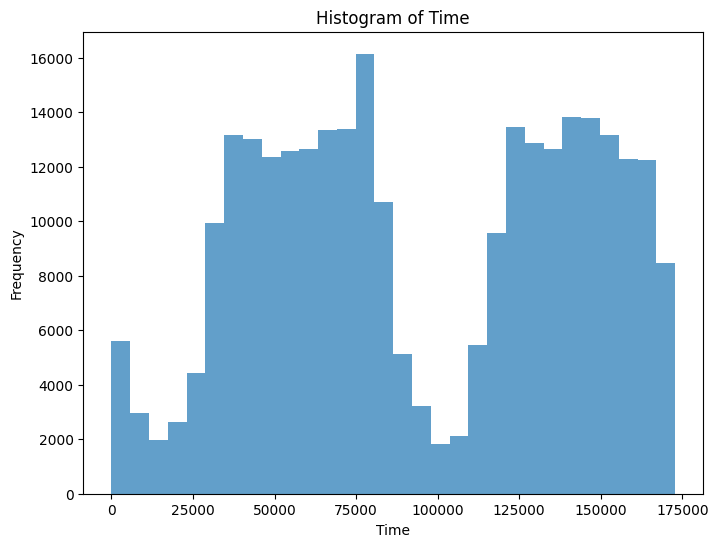

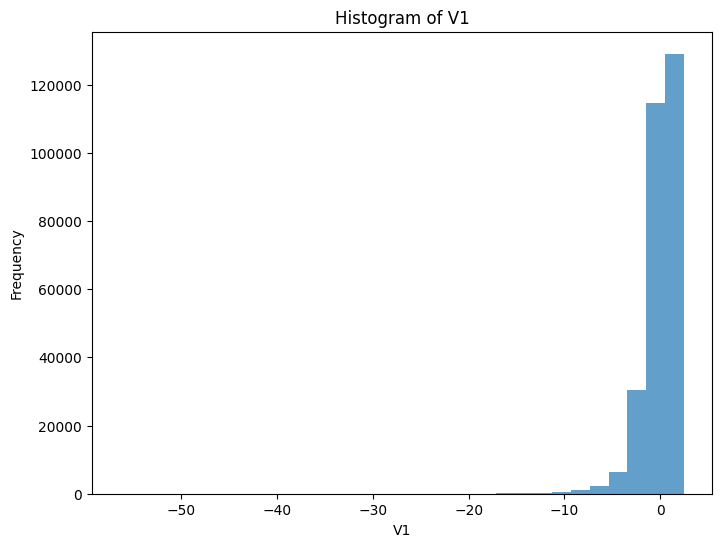

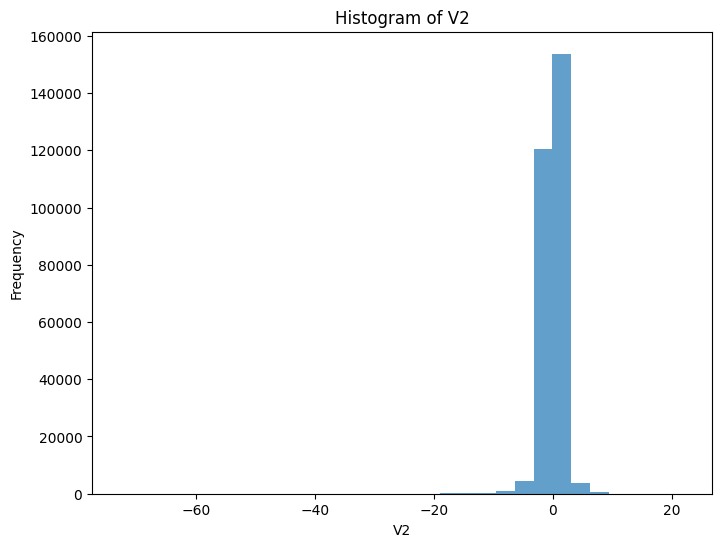

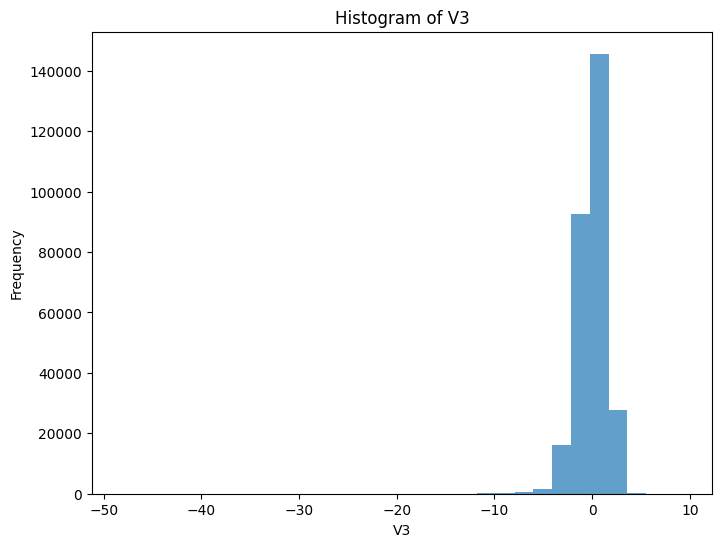

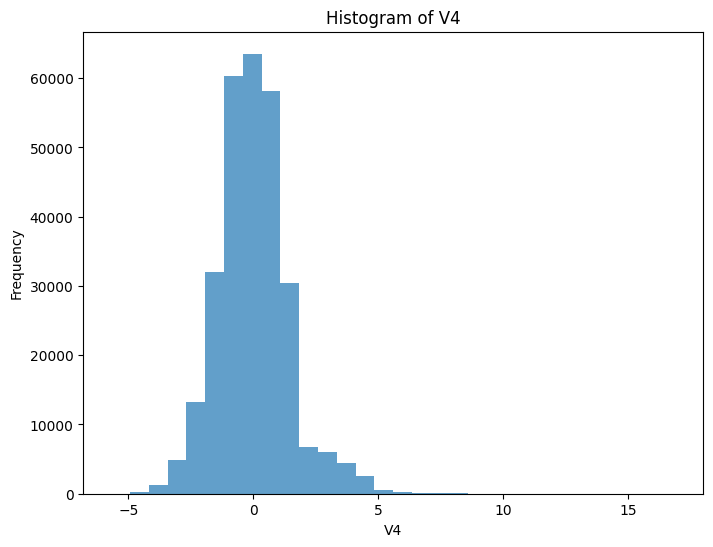

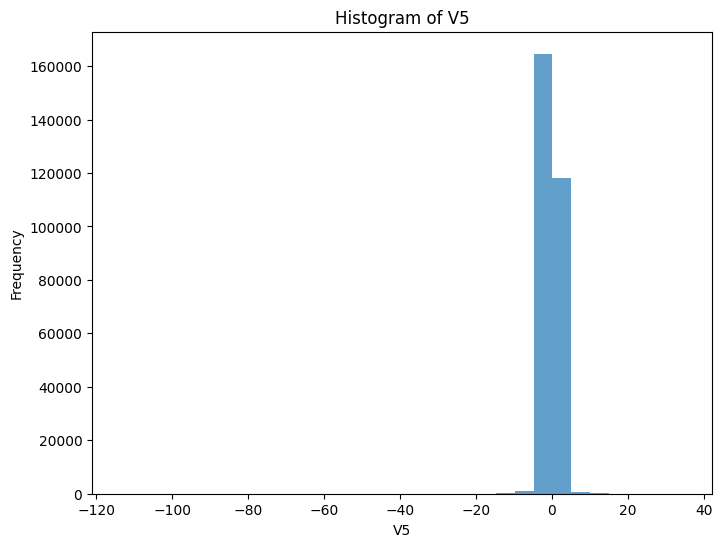

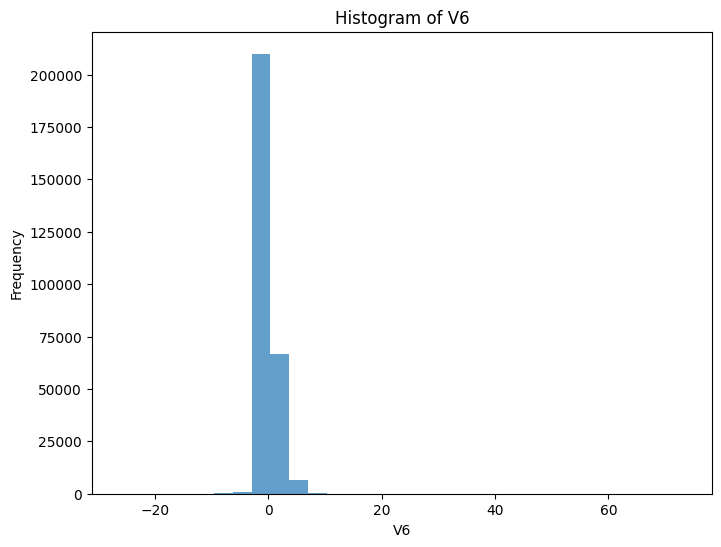

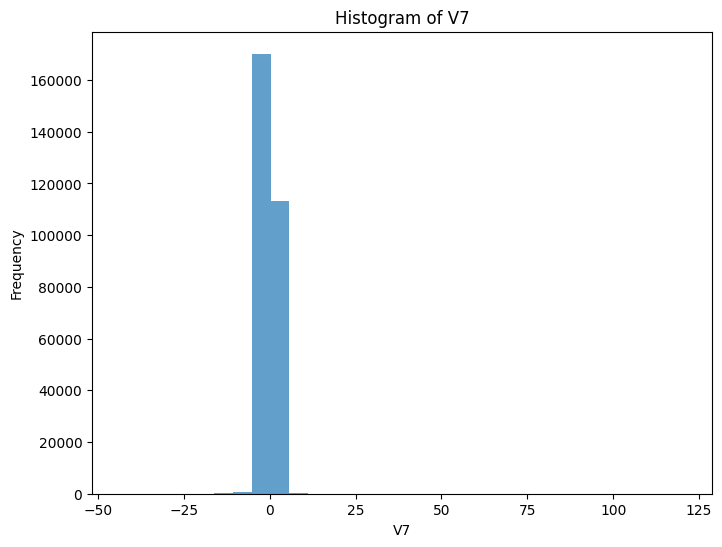

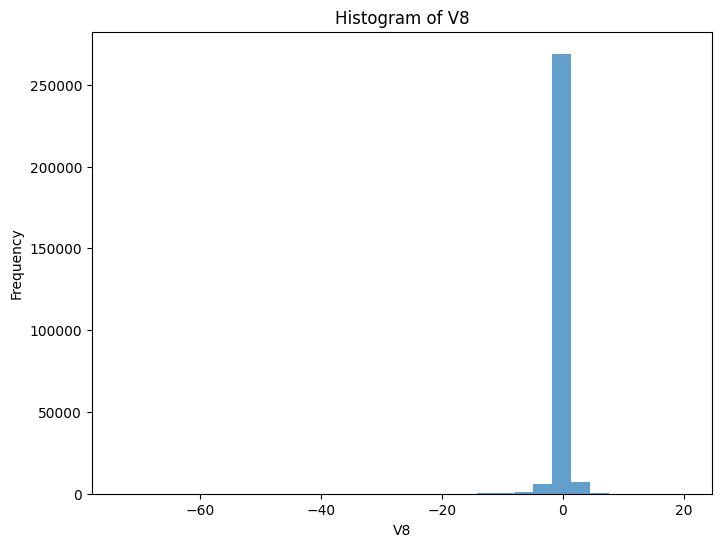

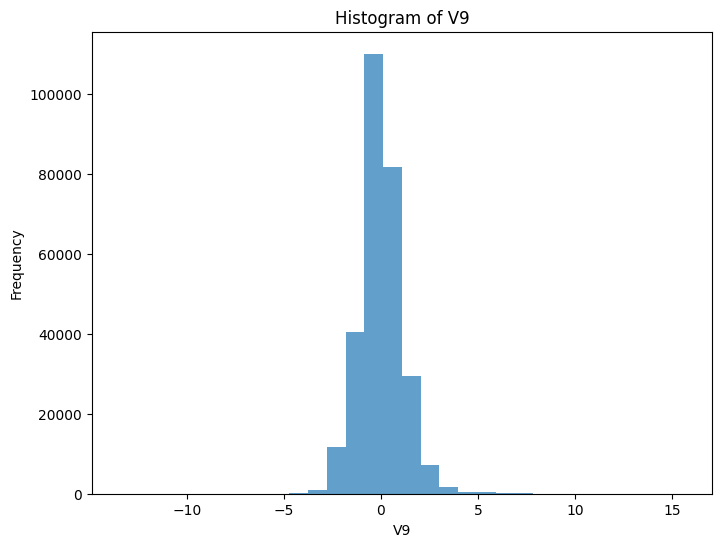

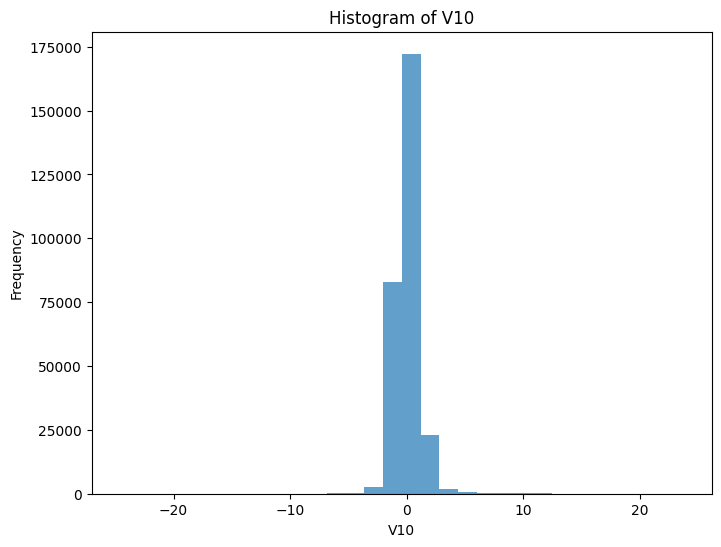

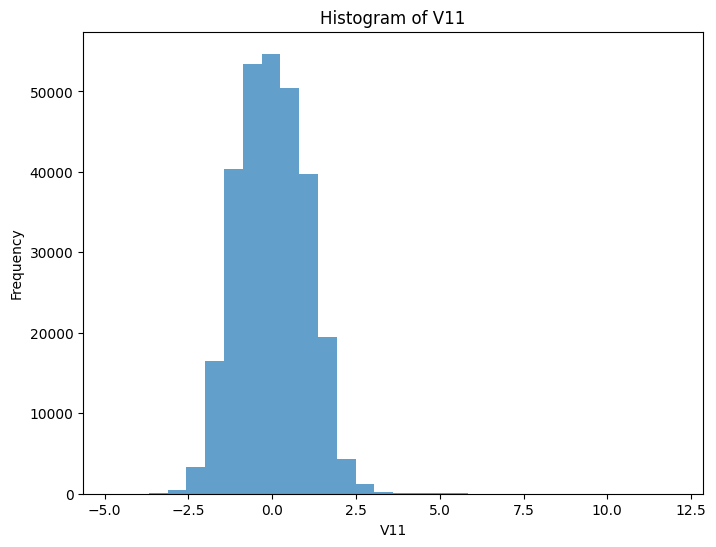

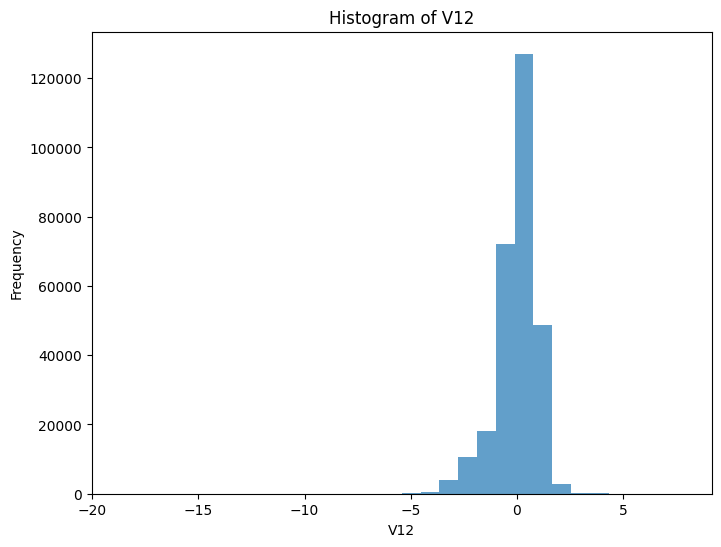

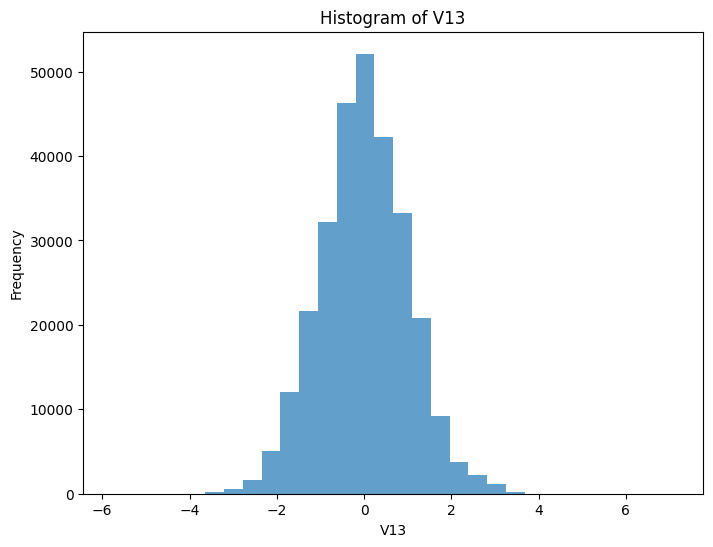

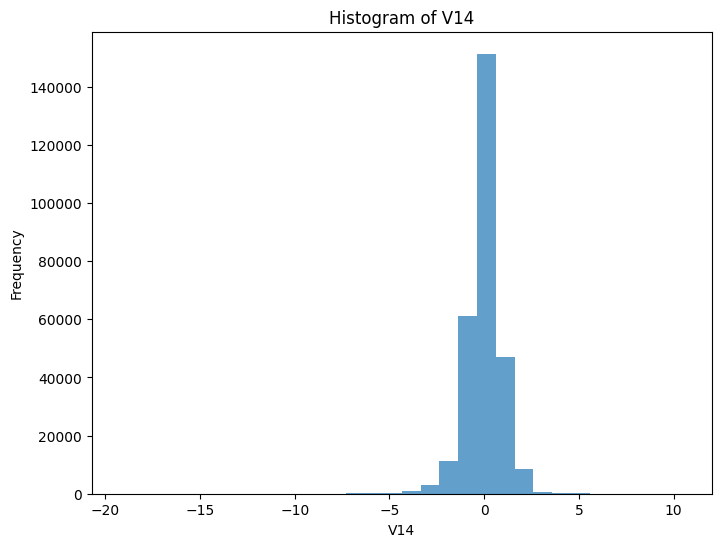

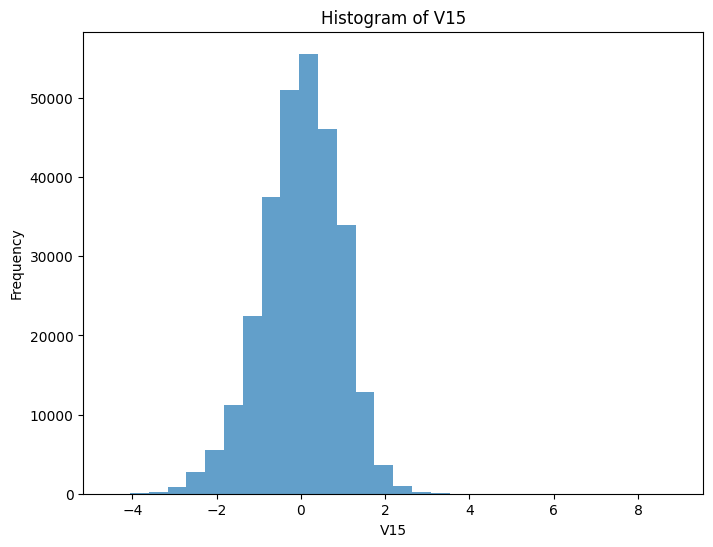

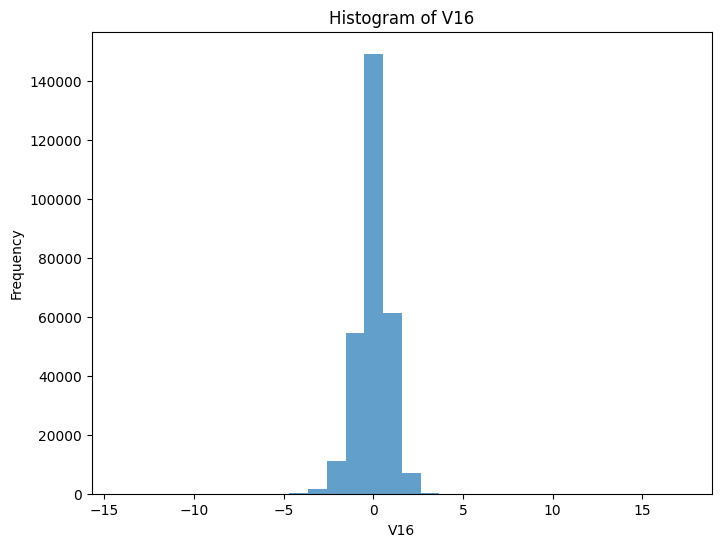

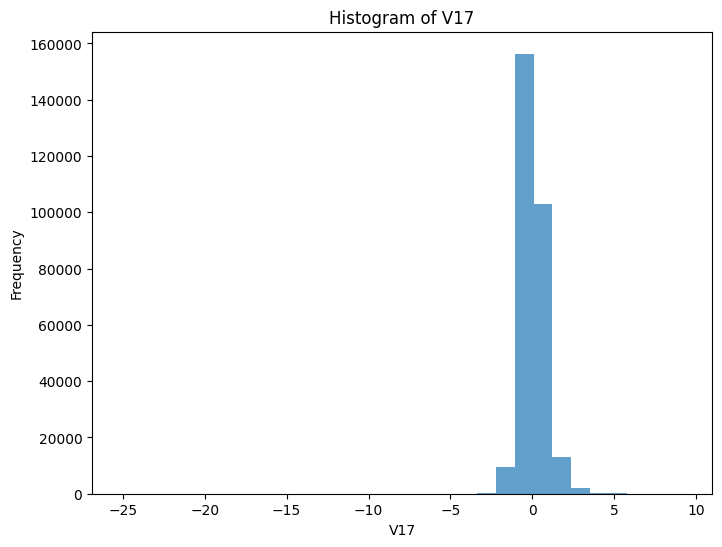

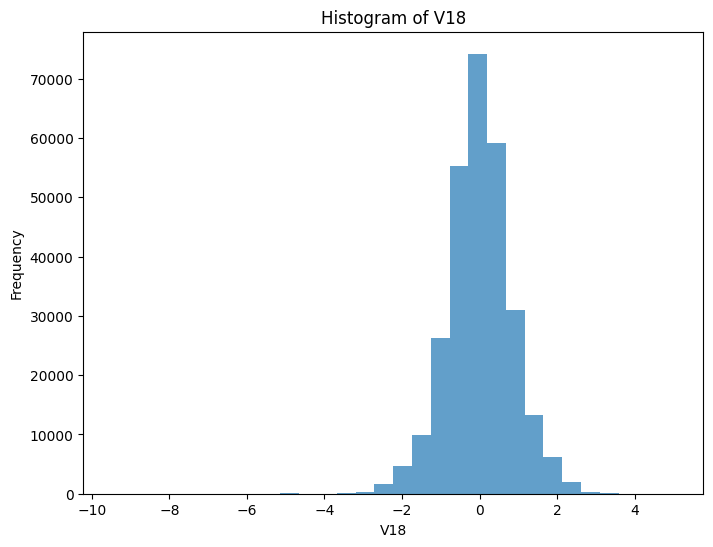

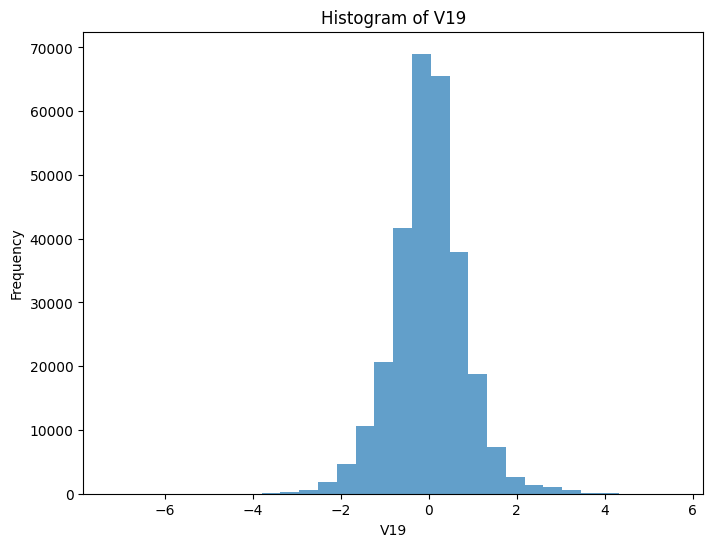

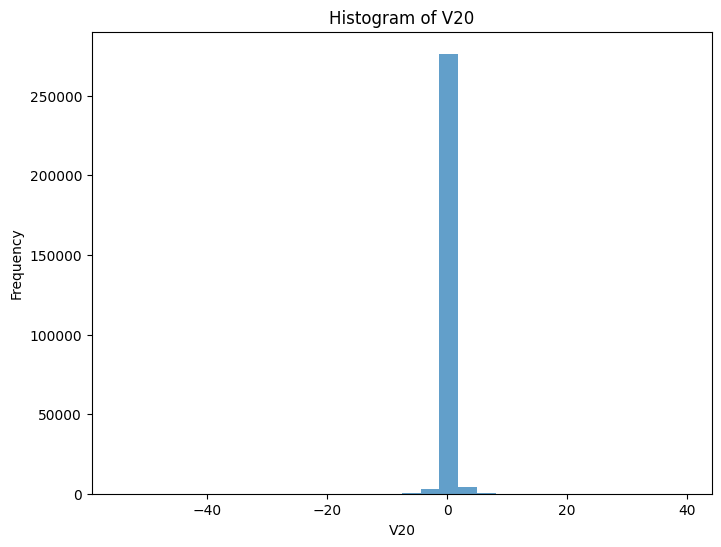

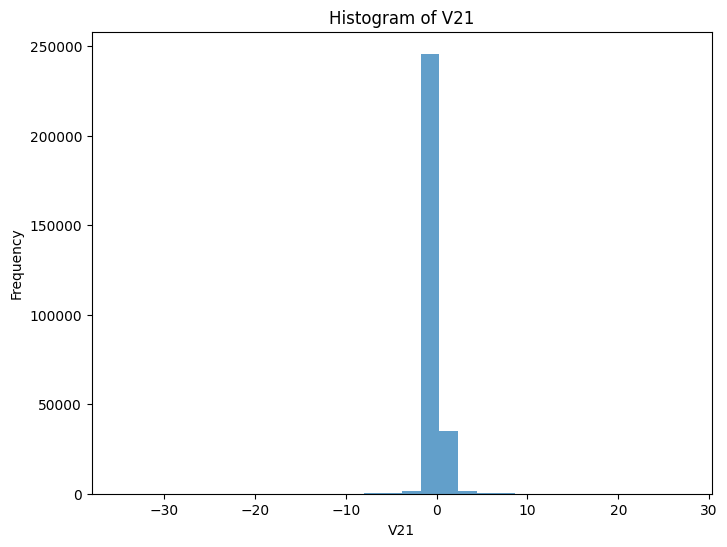

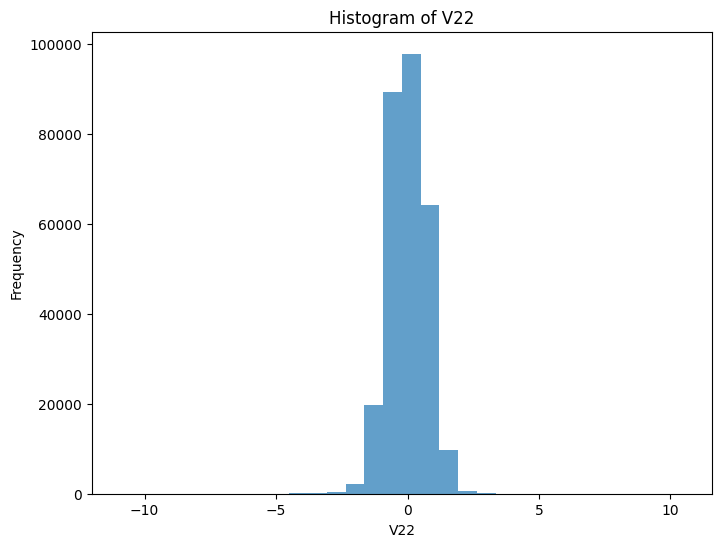

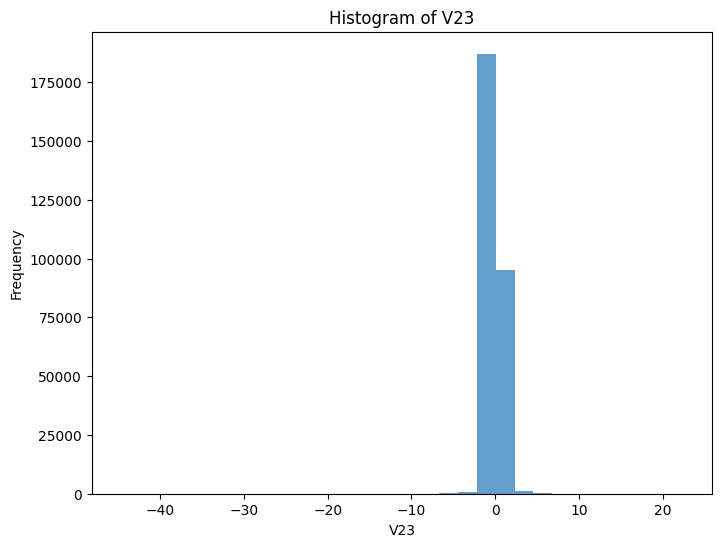

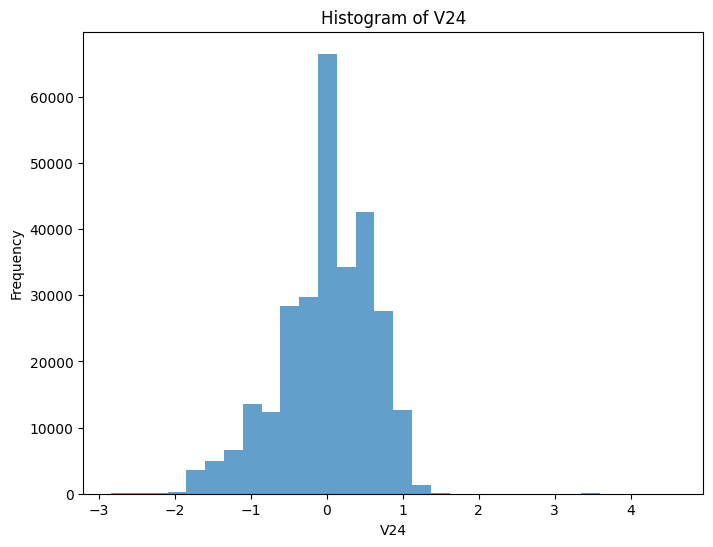

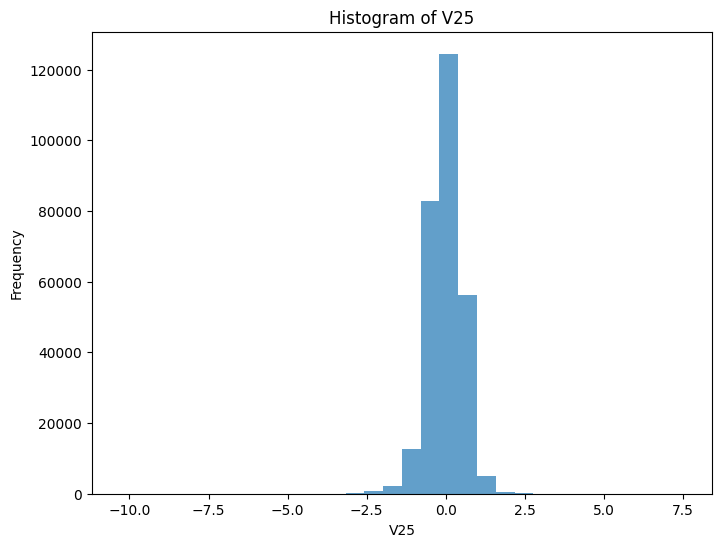

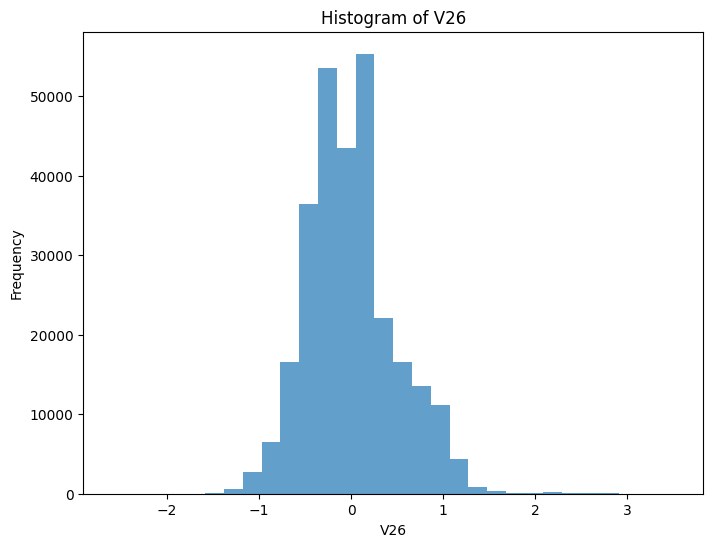

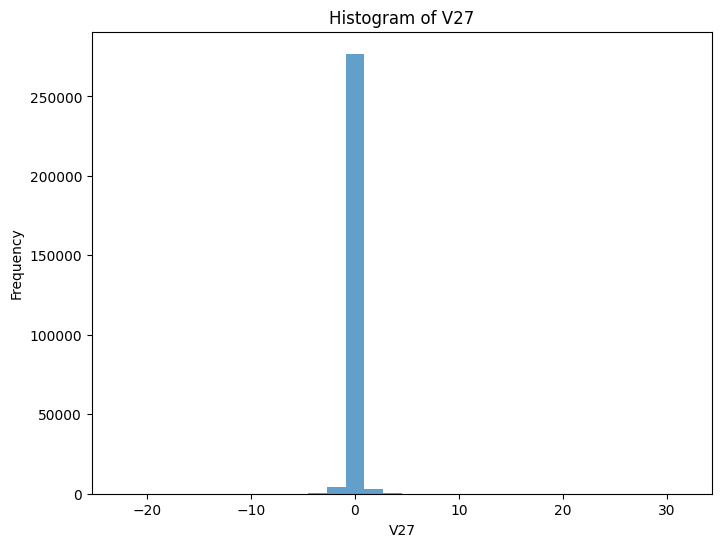

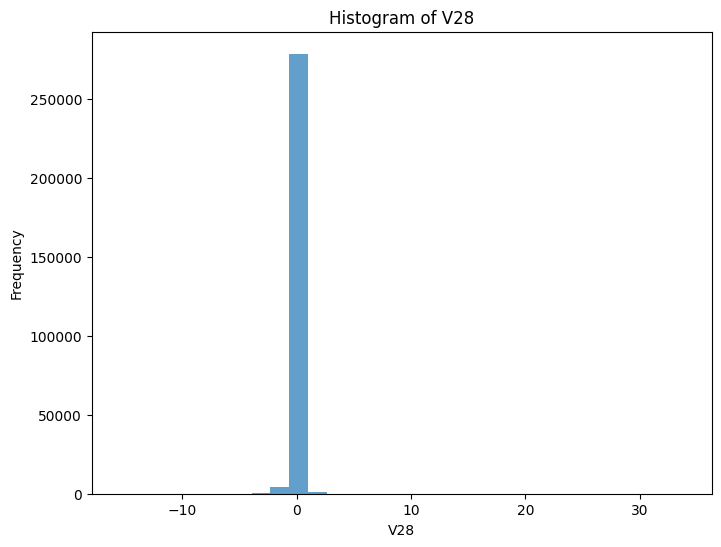

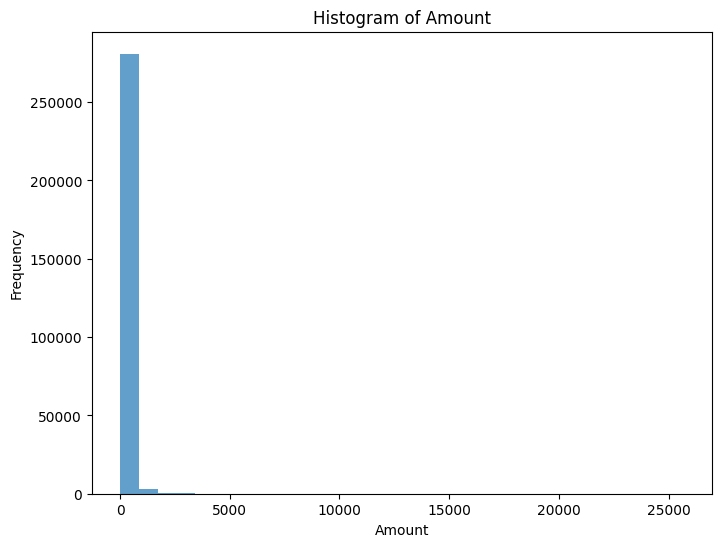

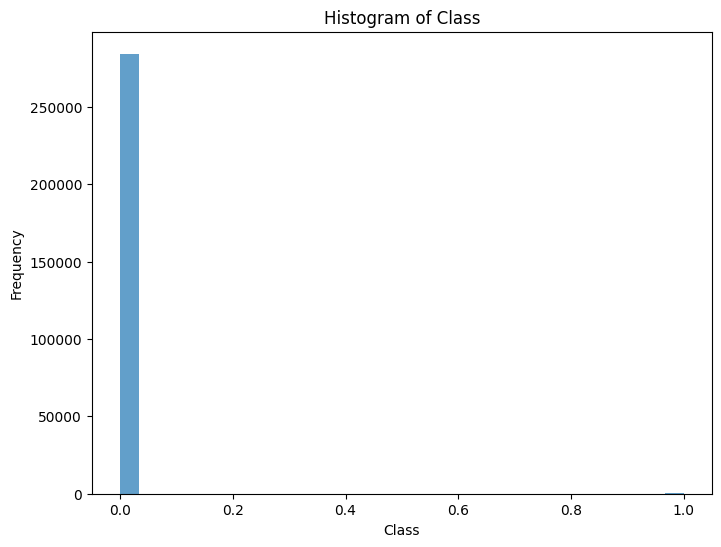